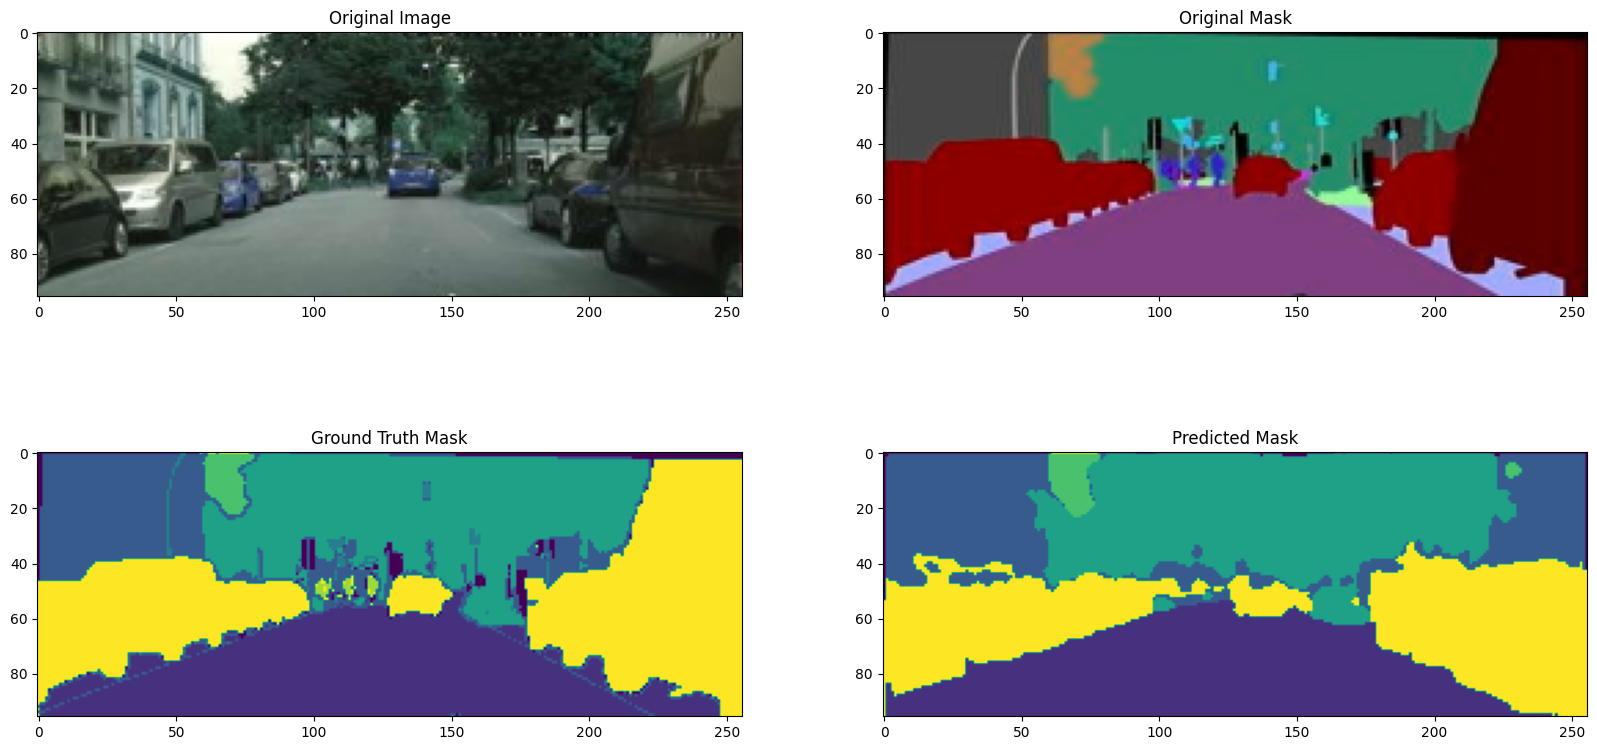

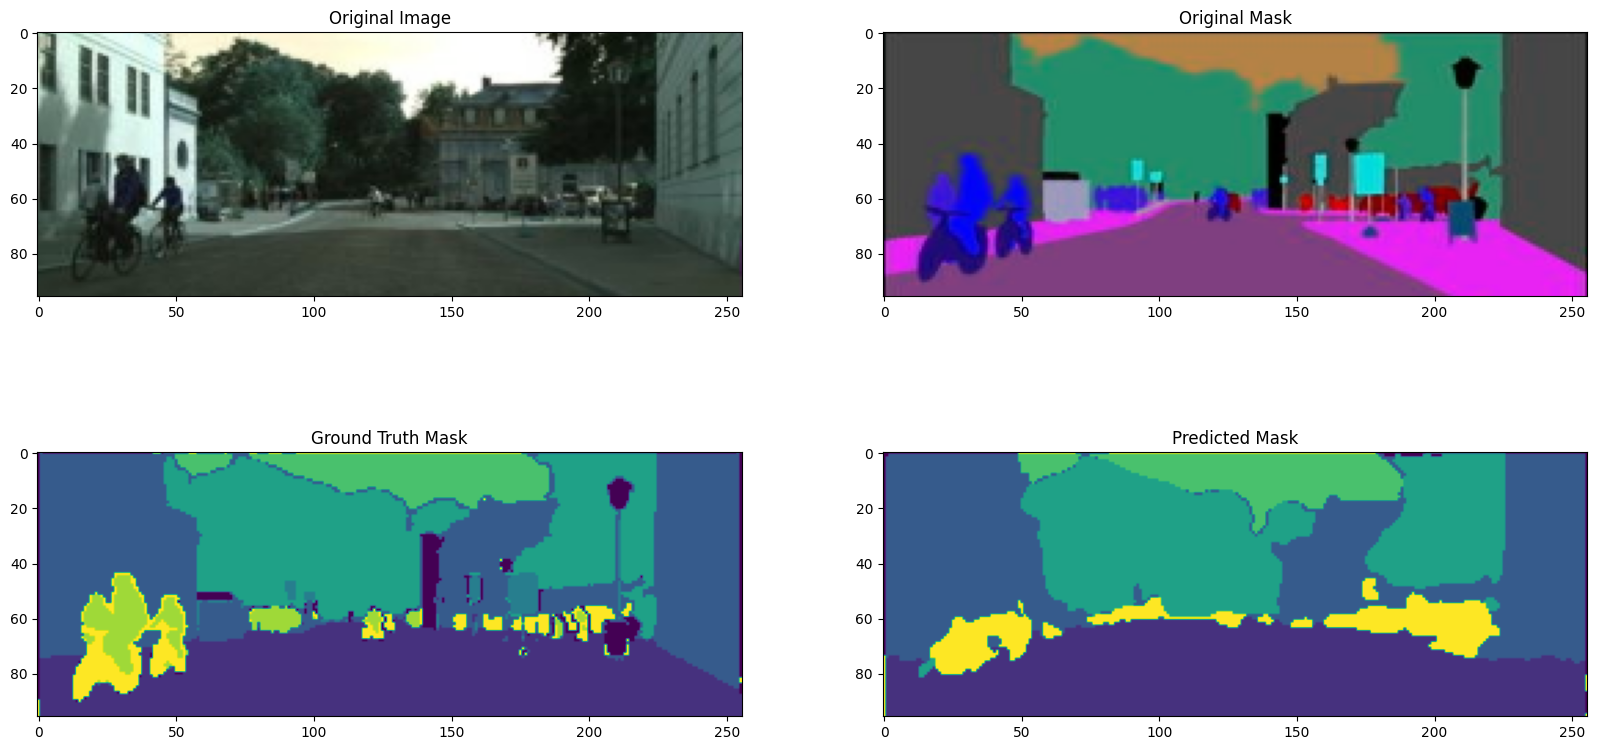

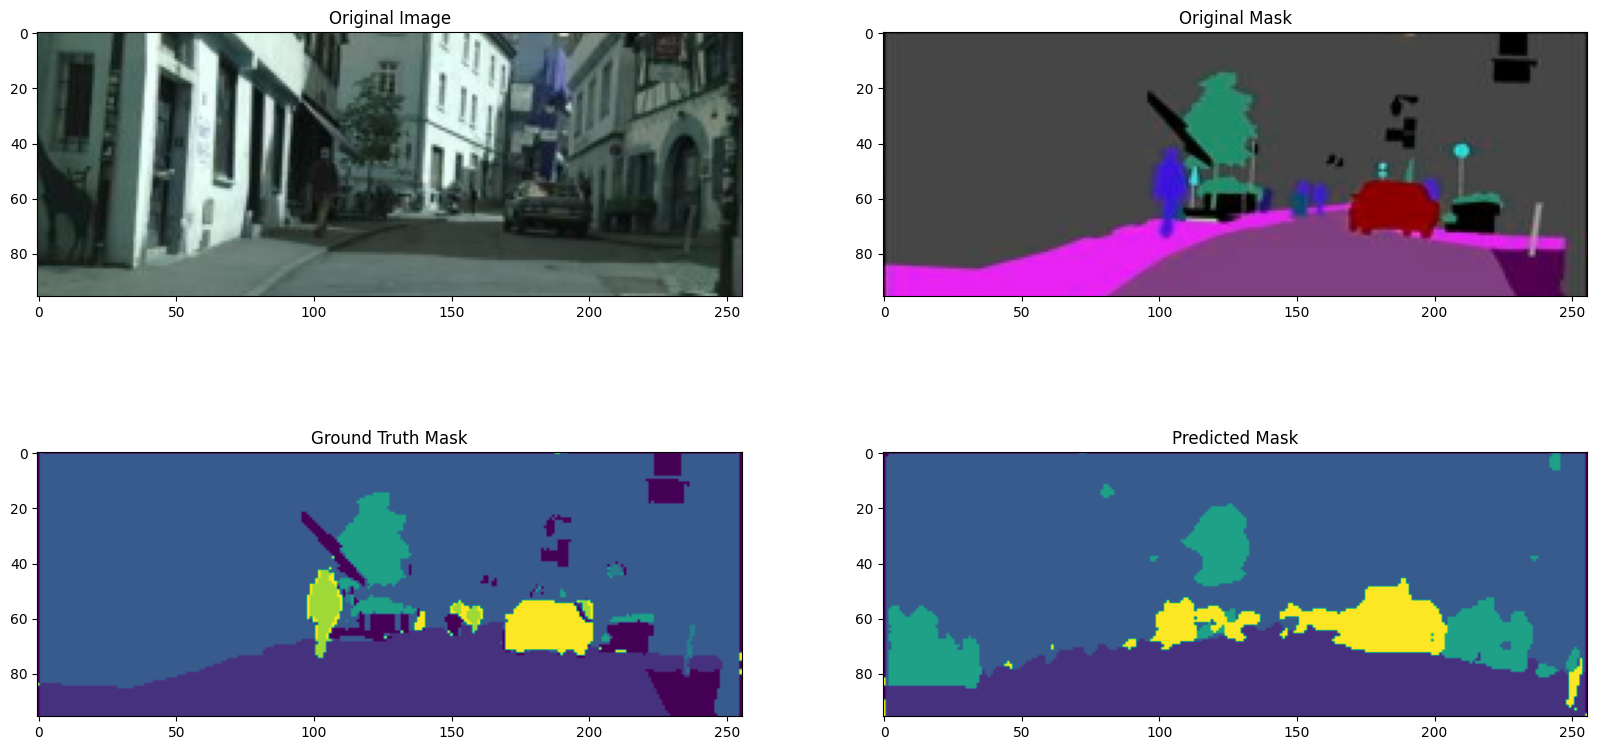

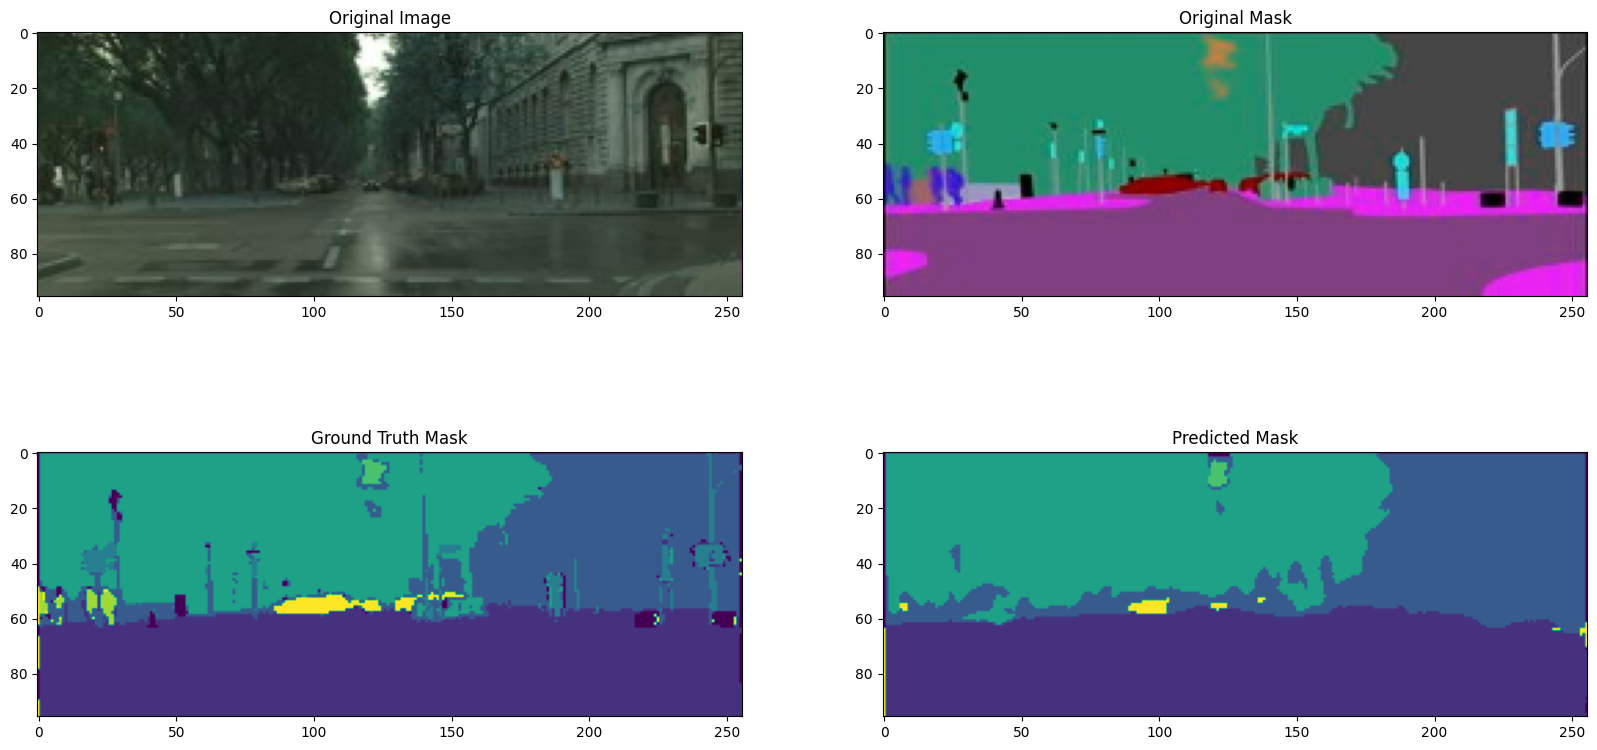

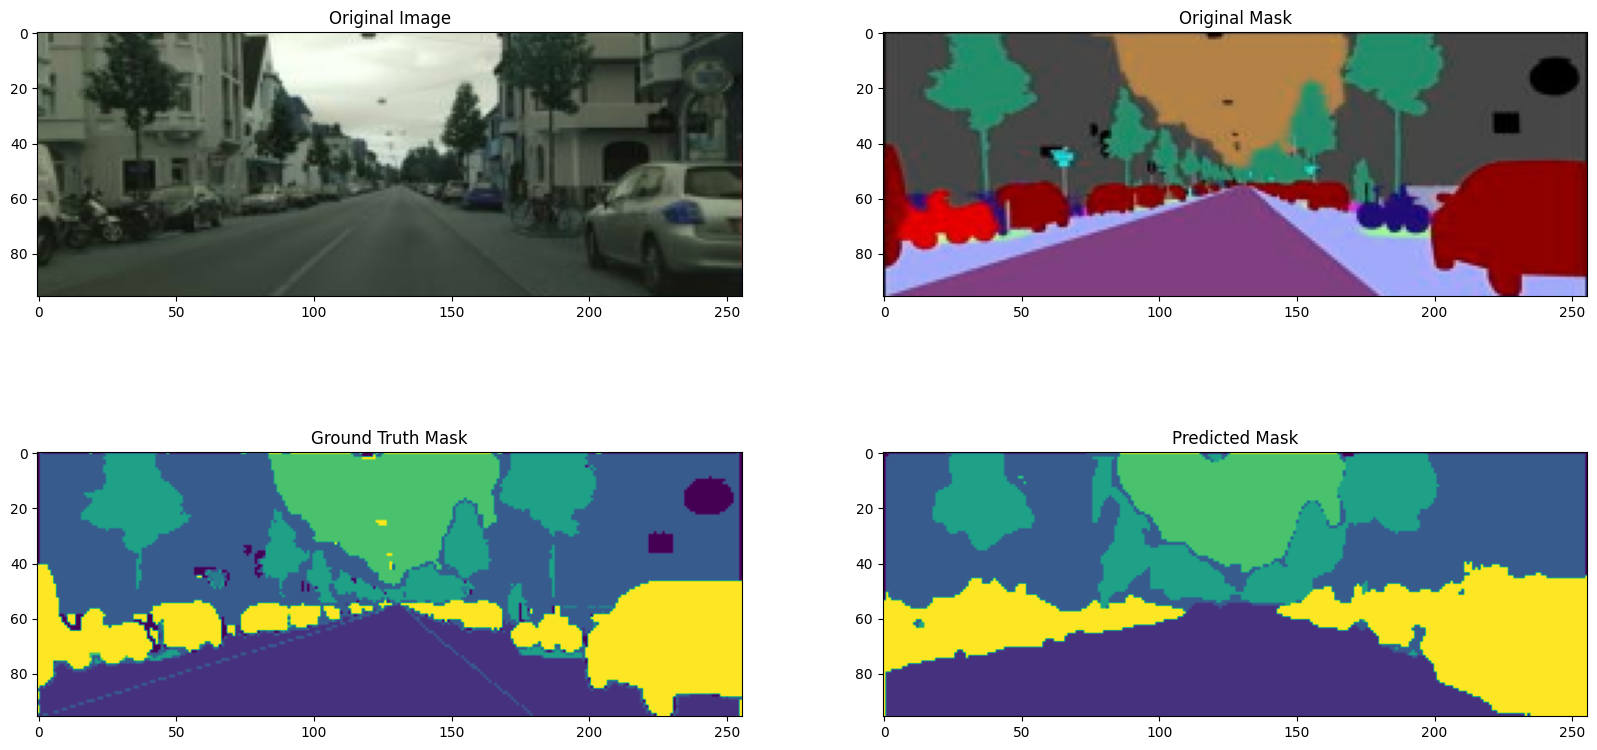

In [13]:
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision.transforms import v2 as transforms

from model_unet import UNet
from data import CityScapesDataset

torch.manual_seed(11)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
transform = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
])

val_dataset = CityScapesDataset('/kaggle/input/cityscapes', kind='train', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=5, shuffle=True)

model = UNet(in_channels=3, out_channels=8).to(device)
model.load_state_dict(torch.load('model/state_dict.pth', map_location=device, weights_only=True))

batch = next(iter(val_loader))
inputs, labels = batch['image'].to(device), batch['mask'].to(device)
original_image = batch['original_image']
original_mask = batch['original_mask']

outputs = model(inputs).detach().cpu()
outputs = outputs.argmax(dim=1)

for i in range(5):
    fig, ax = plt.subplots(2, 2, figsize=(20, 10))
    ax[0, 0].imshow(original_image[i].permute(1, 2, 0))
    ax[0, 0].set_title('Original Image')

    ax[0, 1].imshow(original_mask[i].permute(1, 2, 0))
    ax[0, 1].set_title('Original Mask')

    ax[1, 0].imshow(labels[i].cpu())
    ax[1, 0].set_title('Ground Truth Mask')

    ax[1, 1].imshow(outputs[i].cpu())
    ax[1, 1].set_title('Predicted Mask')

    plt.show() 